<a href="https://colab.research.google.com/github/ms624atyale/NLP_2024/blob/main/13_Sentiment_HarryPotter_PolSubj_HarryPotter_Aesop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🐹 🐾 🐟 This script is based on [**Prof. Hosung Nam's github (hsnam95)**](https://github.com/hsnam95) and [**Prof. Junkyu Lee's github (junkyuhufs)**](https://github.com/junkyuhufs)

In [ ]:
#@markdown ##🐹 🐾  <font color = 'red'> **[1] 복제하여 Harry Potter자료 가져오기**
!git clone https://github.com/ErikaJacobs/Harry-Potter-Text-Mining.git

Cloning into 'Harry-Potter-Text-Mining'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 106 (from 1)
Receiving objects: 100% (109/109), 13.39 MiB | 17.03 MiB/s, done.
Resolving deltas: 100% (32/32), done.


##🐹 🐾  <font color = 'blue'> **[2] 데이터 전처리: Pandas이용 데이터 정리 (책의 한 챕터가 한 셀에 있는 상태)**

In [ ]:
import pandas as pd # Pandas comes pre-installed in Colab.

#%cd is a magic command used in Colab to change the current working directory.
#This line navigates to the directory (e.g., folder), where seven text files are stored.
%cd /content/Harry-Potter-Text-Mining/Book Text

import glob              # glob module, which is used to find files and directories matching a specified pattern.
fns = glob.glob('*.txt') # glob.glob('*.txt') retrieves a list of all .txt files in the current working directory.
df = pd.DataFrame()      # Initializes an empty DataFrame called df using Pandas, which will be used to store data from all the .txt files combined.

for fn in fns:                     # loops through the list of .txt files (fns) retrieved earlier.
  dftmp = pd.read_csv(fn, sep="@") # read_csv read comma separated files or other delimited text files with @. Variable name _fn_ is each .txt file under the 'Book Text' folder.
                                   # indicates Pandas to treat the @ symbol as the delimiter separating columns within the file.
  df = pd.concat([df, dftmp])      # combines all data from dftmp DataFrame with the empty df DataFrame.
%cd /content                       # Back to the base directory of Colab

df
# compare with print(df)

/content/Harry-Potter-Text-Mining/Book Text
[Errno 2] No such file or directory: '/content # Back to the base directory of Colab'
/content/Harry-Potter-Text-Mining/Book Text


,Text,Chapter,Book
0,It was nearing midnight and the Prime Ministe...,1,6
1,Many miles away the chilly mist that had pres...,2,6
2,Harry Potter was snoring loudly. He had been ...,3,6
3,Despite the fact that he had spent every waki...,4,6
4,Harry and Dumbledore approached the back door...,5,6
...,...,...,...
14,"Dippet sank back, looking faintly disappointed...",15,2
15,\The appointment - or suspension - of the he...,16,2
16,"stood, terrified, waiting. There was a strange...",17,2
17,"\Right,\"" said Professor McGonagall, whose n...",18,2


##🐹 🐾  **[3] 데이터 전처리 불용어(stopwords) 제거**

In [ ]:
!pip install nltk
import nltk #Import NLTK library

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk import word_tokenize
from nltk.corpus import stopwords #Import stopwords to Python

stopwords = set(stopwords.words('english')) # loads a set of common words in English (known as "stopwords") that are typically removed from text during preprocessing.

import string # built-in python module, removing punctuation or filtering characters

# Function for removing punctuation
def remove_punctuations(text):               # takes a string (text) as input.
    for punctuation in string.punctuation:   # iterates through each punctuation symbol in a string of all punctuation characters.
        text = text.replace(punctuation, '') # replace each punctuation symbol with an empty string.
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords
# step1: for x in stopwords: if stopwords contains ['this', 'is', 'a', 'sample'], then in each iteration, x will take one of these values: 'this', 'is', 'a', 'sample'.
# step2: if item not in string.punctuation: if the character isn't a punctuation mark (i.e., it's a letter or a number), it passes the condition and will be included in the next step of the operation, and if it is a punctuation mark, it is excluded ('hi!' to 'hi').
# step3: for item in x: loops over each character in the string x.
# step4: ''.joing(item: the cleaned word (without punctuation) is then joined back together with an empty string, NOT _a punctuation mark_.


#🔨🔧 in progress as of December 6, 2024
df['WordCountText']=df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count Text
# Word Count
df['WordCloudText']=df['WordCountText'].apply(lambda x: [word for word in x if word not in stopwords]) # Word Cloud Text
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


##🐹 🐾  **[4] 데이터 전처리: 책 > 문장단위로 (챕터가 문장단위로 나뉜 상태)**

In [ ]:
# Creating a table breaking down the text by each sentence, rather than each chapter.
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem import PorterStemmer

# Make smaller table - reset index to prepare for further work
dfsentiment = df[['Book','Chapter','Text']].reset_index() \
    .drop(["index"], axis=1)
dfsentiment = dfsentiment.join(dfsentiment.Text.apply(sent_tokenize).rename('Sentences')) # Breaking apart text into sentences

#Put every tokenized sentence into its own row
dfsentiment2 = dfsentiment.Sentences.apply(pd.Series) \
    .merge(dfsentiment, left_index = True, right_index = True) \
    .drop(["Text"], axis = 1) \
    .drop(["Sentences"], axis = 1) \
    .melt(id_vars = ['Book', 'Chapter'], value_name = "Sentence") \
    .drop("variable", axis = 1) \
    .dropna()

# Sort new table by Book and Chapter - reset index to reflect new order
dfsentiment2=dfsentiment2.sort_values(by=['Book', 'Chapter']) \
    .reset_index() \
    .drop(['index'], axis = 1)

# Clean punctuation, lower case
dfsentiment2['Sentence']=dfsentiment2.Sentence.apply(remove_punctuations).apply(lambda x: x.lower()) \

# Check first five values
dfsentiment2

,Book,Chapter,Sentence
0,1,1,the boy who lived mr and mrs dursley of numbe...
1,1,1,they were the last people youd expect to be in...
2,1,1,mr dursley was the director of a firm called g...
3,1,1,he was a big beefy man with hardly any neck al...
4,1,1,mrs dursley was thin and blonde and had nearly...
...,...,...,...
70979,7,37,the train began to more and harry walked along...
70980,7,37,harry kept smiling and waving even though it w...
70981,7,37,the train rounded a corner
70982,7,37,harrys hand was still raised in farewellhell b...


In [ ]:
#@markdown ##🐹 🐾 **[5] 필요한 라이브러리(VADER library) 불러오기**
#>
#@markdown <font color = 'blue black'> "vader" refers to the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which is implemented as part of NLTK's sentiment module.

#@markdown VADER is **_valence aware_** because it takes into account the intensity of sentiment expressed in the text. It uses a pre-built lexicon (dictionary) of words, each annotated with a sentiment score indicating the positivity or negativity of the word. Additionally, it considers various grammatical and syntactical rules to interpret the sentiment expressed by the combination of words in a sentence.

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


###Harry Potter 예시문장 (stemmed 문장)


|출처 | 예시문장 | 감정 |
|--|--|--|
|[0,1,1]|'the boy who lived mr and mrs dursley of number four privet drive were **proud** to say that they were perfectly normal **thank** you very much'|😄 Positive|[0,1,1]|
|[1,1,1]|'they were the last people youd expect to be involved in anything **strange** or **mysterious** because they just didnt hold with such **nonsense**'|😡 Negative |
|[2,1,1]|'mr dursley was the director of a firm called grunnings which made drills'|😐 Neutral|


+ *Note*. 출처 == [sentence number, Book, Chapter]

In [ ]:
#@markdown ##🐹 🐾 **[6] 문장별로 감정분석 점수 부여; Compound, positive, negative, neutral**
# Get intensity scores of each sentence
dfsentiment2['Score']=dfsentiment2.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
dfsentiment2['CompScore']=dfsentiment2.Score.apply(lambda x: x.get("compound"))
dfsentiment2['PosScore']=dfsentiment2.Score.apply(lambda x: x.get("pos"))
dfsentiment2['NegScore']=dfsentiment2.Score.apply(lambda x: x.get("neg"))
dfsentiment2['NeuScore']=dfsentiment2.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
dfsentiment2 = dfsentiment2.drop(["Score"], axis=1)

# Adding Sentiment Flags
dfsentiment2['PosFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment2['NegFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment2['NeuFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

In [ ]:
#@markdown ##🐹 🐾 **[7] 처음 나온 결과 20개 보기**
dfsentiment2.head(20)

,Book,Chapter,Sentence,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,1,1,the boy who lived mr and mrs dursley of numbe...,0.8779,0.335,0.000,0.665,1,0,0
1,1,1,they were the last people youd expect to be in...,-0.5423,0.000,0.176,0.824,0,1,0
2,1,1,mr dursley was the director of a firm called g...,0.0000,0.000,0.000,1.000,0,0,1
3,1,1,he was a big beefy man with hardly any neck al...,0.0000,0.000,0.000,1.000,0,0,1
4,1,1,mrs dursley was thin and blonde and had nearly...,0.4927,0.084,0.000,0.916,1,0,0
5,1,1,the dursleys had a small son called dudley and...,-0.2960,0.000,0.121,0.879,0,1,0
6,1,1,the dursleys had everything they wanted but th...,0.3612,0.199,0.148,0.653,1,0,0
7,1,1,they didnt think they could bear it if anyone ...,0.0000,0.000,0.000,1.000,0,0,1
8,1,1,mrs potter was mrs dursleys sister but they ha...,0.0000,0.000,0.000,1.000,0,0,1
9,1,1,the dursleys shuddered to think what the neigh...,0.0000,0.000,0.000,1.000,0,0,1


* Negative Flag:  18385
* Neutral Flag:  33544
* Positive Flag:  19055
Total:  70984


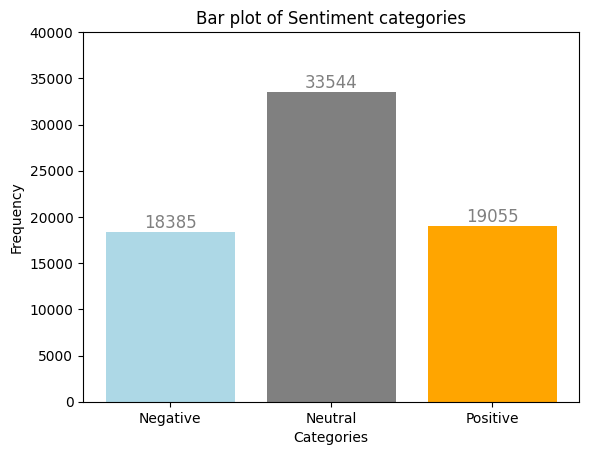

In [ ]:
#@markdown ##🐹 🐾 **[8] <font color = 'red'> 감정분석 결과 막대그래프 (부정, 중립, 긍정)**

print('* Negative Flag: ', dfsentiment2['NegFlag'].sum())
print('* Neutral Flag: ', dfsentiment2['NeuFlag'].sum())
print('* Positive Flag: ', dfsentiment2['PosFlag'].sum())
print("="*50)
print('Total: ',dfsentiment2['PosFlag'].sum()+dfsentiment2['NeuFlag'].sum()+dfsentiment2['NegFlag'].sum())


import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment2['NegFlag'].sum())
Neutral = int(dfsentiment2['NeuFlag'].sum())
Positive = int(dfsentiment2['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]
# freqs = [18385, 33544, 19055]

# Create labels for the bars
labels = ['Negative', 'Neutral', 'Positive']

# Create x coordinates for the bars
x = np.arange(len(labels))

# Generate the bar plot
plt.bar(x, freqs)


# Specify the colors for each category
colors = ['lightblue', 'gray', 'orange']

# Generate the bar plot with custom colors

bars = plt.bar(x, freqs, color=colors)
# Add labels to the x-axis
plt.xticks(x, labels)

# Set axis labels
plt.xlabel('Categories')
plt.ylabel('Frequency')

# Set a title for the plot
plt.title('Bar plot of Sentiment categories')
plt.ylim(0, 40000)
# Add the frequency text within each bar
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, str(freq),
             ha='center', va='bottom', fontsize=12, color='gray')


# Display the plot
plt.show()

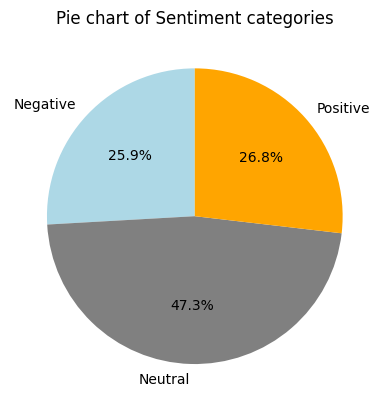

In [ ]:
#@markdown ##🐹 🐾 **[9] <font color = 'red'> 감정분석 카테고리 파이차트 (비율확인용)**
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment2['NegFlag'].sum())
Neutral = int(dfsentiment2['NeuFlag'].sum())
Positive = int(dfsentiment2['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories')

# Display the plot
plt.show()

##🐹🍎 **Interpretating Polarity and Subjectivity**

**Polarity 극성:** 0.131

Interpretation: The polarity score of 0.136 suggests that the text has a slightly positive sentiment, but it's not strongly positive. This means the emotions expressed in the text lean toward the positive side, but the overall tone is fairly neutral with just a mild positive inclination. Range Context: Polarity scores close to 1 would indicate very positive sentiment. Scores close to -1 would indicate strong negative sentiment. A score around 0 would indicate neutral sentiment. In this case, 0.136 shows a moderately positive sentiment, perhaps expressing mild approval or contentment.

**Subjectivity 주관성:** 0.515

Interpretation: The subjectivity score of 0.518 indicates that the text is slightly more subjective than objective. This suggests that the text contains a balance between personal opinions, emotions, or beliefs and factual or objective statements, but it leans a little toward subjective (opinion-based) content. Range Context: Scores closer to 1 suggest the text is highly subjective (mainly personal opinions or emotions). Scores closer to 0 suggest the text is highly objective (based on facts or verifiable information). A score of 0.518 suggests that the text likely contains a mix of subjective opinions and factual information but is more on the subjective side. Overall Interpretation: The text analyzed is slightly positive in tone (mild positive sentiment) and contains a balance of opinions and facts, but with a small tilt toward subjectivity. It likely expresses some personal feelings or opinions, though not overwhelmingly so, and doesn't contain strong emotional language.

**📚👓 [Harry Potter Series by J.K. Rowling](https://www.google.com/search?q=j.k.rowling+harry+potter&oq=j.k.rowling+harry+potter&gs_lcrp=EgZjaHJvbWUqCggAEAAY4wIYgAQyCggAEAAY4wIYgAQyBwgBEC4YgAQyCAgCEAAYFhgeMggIAxAAGBYYHjIICAQQABgWGB4yCAgFEAAYFhgeMggIBhAAGBYYHjIICAcQABgWGB4yCAgIEAAYFhgeMggICRAAGBYYHtIBCDkxMzBqMGo3qAIIsAIB&sourceid=chrome&ie=UTF-8#wptab=si:ACC90nz0YWY8iFpJ55GXrmf6uj1OdPJAnTjrtt8uaANAjn8GLioZyMpIW1eGt1Wv3ln7i7TVQiNXgJrPpp8DMqNLwIoPUUumBjpctNjedrL0Tlk4K2LwpWFIFsCtXsCIONVULmTs5ghK)**

- **<font color = 'red'> Harry Potter and the Philosopher's Stone in 1997**
- **<font color = 'green'> Harry Potter and the Chamber of Secrets in 1999**
- **<font color = 'pink'> Harry Potter and the Prisoner of Azkaban in 1999**
- **<font color = 'brown'> Harry Potter and the Goblet of Fire in 2000**
- **<font color = 'yellow'> Harry Potter and the Order of the Phoenix in 2003**
- **<font color = 'sky blue'> Harry Potter and the Half-Blood Prince in 2005**
- **<font color = 'gray'> Harry Potter and the Deathly Hallows in 2007**
- **<font color = 'black'> Harry Potter and the Cursed Child in 2016**

In [ ]:
#@markdown ##🐹 🐾  <font color = 'red'> **[1] 복제하여 Harry Potter자료 가져오기**
!git clone https://github.com/ErikaJacobs/Harry-Potter-Text-Mining.git

Cloning into 'Harry-Potter-Text-Mining'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 106 (from 1)
Receiving objects: 100% (109/109), 13.39 MiB | 12.81 MiB/s, done.
Resolving deltas: 100% (32/32), done.


**📕👀 <font color = 'red'> [Polarity & Subjectivity of Book1]**

In [ ]:
file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook1.txt")
text = file.read().replace("\n", " ")
file.close()

!pip install textblob         # Install TextBlob for sentiment analysis
from textblob import TextBlob # TextBlob( ) is a class used for tasks such as sentiment analysis, POS tagging, noun phrase extraction, translation, and more.

# Perform sentiment analysis
blob = TextBlob(text) #blob is an instance of the TextBlob class
sentiment = blob.sentiment #sentiment is a property of the TextBlob class. The TextBlob object (i.e., blob) internally calls its sentiment analyzer and returns a Sentiment object.
# ⬇️ see below for the codeline of blob.sentiment in detail 🐥🐥

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")
# ⬇️ see below for f string with a simple example below 👀 👀

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.04882638666543532, Subjectivity: 0.4725836033506114


↕️ 🐥🐥 Codeline of "blob.sentiment" returns an instance of the Sentiment class. It has two main attributes:

    * Polarity:

      Measures the positivity or negativity of the text.
      Range: [-1.0, 1.0].
      Example: 0.8 is positive, -0.5 is negative, 0.0 is neutral.
>
    * subjectivity:

      Measures how subjective or objective the text is.
      Range: [0.0, 1.0].
      Example: 0.0 is purely objective, 1.0 is highly subjective.

### ↕️ 👀 👀 **f-string (f문자열)**

The f in f"..." is a prefix that stands for formatted string literal형식화된 문자열 (commonly called an f-string) in Python. It allows easy and readable string formatting by embedding expressions directly inside string literals.

Python에서 f"..."의 **f**는 형식화된 문자열 리터럴(formatted string literal)을 나타내는 접두사이다(일반적으로 f-string). 이는 문자열 리터럴 안에 표현식을 직접 삽입하여 쉽고 가독성 높은 문자열 포맷팅을 가능하다.

In [ ]:
name = 'Alice'
age = 16
message = f"My name is {name}, and I am {age} years old."
print(message)

print('\n')

print(f"My name is {name}, and I am {age} years old.")

My name is Alice, and I am 16 years old.


My name is Alice, and I am 16 years old.


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book2]**

file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook2.txt")
text = file.read().replace("\n", " ")
file.close()

!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

Polarity: 0.04443306002278195, Subjectivity: 0.4917725163540899


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book3]**
file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook3.txt")
text = file.read().replace("\n", " ")
file.close()

!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

Polarity: 0.031759632369443354, Subjectivity: 0.4836736616106544


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book4]**
file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook4.txt")
text = file.read().replace("\n", " ")
file.close()

!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

Polarity: 0.05080239081845654, Subjectivity: 0.4731546612715397


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book5]**

file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook5.txt")
text = file.read().replace("\n", " ")
file.close()

!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

Polarity: 0.03633364588837601, Subjectivity: 0.48786731840965875


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book6]**

file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook6.txt")
text = file.read().replace("\n", " ")
file.close()

!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

Polarity: 0.05648444100225371, Subjectivity: 0.4958109194396174


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book7]**
file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook7.txt")
text = file.read().replace("\n", " ")
file.close()

!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

Polarity: 0.04616280540180598, Subjectivity: 0.47887877848160737


**📚👓 [Aesop Fables for Children on Project Gutenberg](https://www.gutenberg.org/ebooks/19994)**

**🐹❄️ [Who is Aesop?](https://en.wikipedia.org/wiki/Aesop)**

In [ ]:
!git clone https://github.com/ms624atyale/NLP_2024

Cloning into 'NLP_2024'...
remote: Enumerating objects: 592, done.
remote: Counting objects: 100% (427/427), done.
remote: Compressing objects: 100% (244/244), done.
remote: Total 592 (delta 286), reused 270 (delta 181), pack-reused 165 (from 1)
Receiving objects: 100% (592/592), 15.53 MiB | 16.09 MiB/s, done.
Resolving deltas: 100% (335/335), done.


In [ ]:
file = open("/content/NLP_2024/Sample_ClassActivity/4_Aesop4Children_CSV_BodyONY_Sample4ClassActivity.csv")
text = file.read().replace("\n", " ")
file.close()

# Install TextBlob if not already installed
!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.0240036465036465, Subjectivity: 0.489300193050193
